# Introduction to Neural Networks (briefly)
### Tyamin Ilya (tg: @mrshrimp_it)

Ниже представлены краткие пункты, которые были представлены в модулях по этой теме

* 
Нейронную сеть можно представить в виде черной коробки (так как мы не знаем, что происходит внутри нее, а имеем только входные и выходные данные). 
* Нейронную сеть можно представить в виде совокупности слоев (входного, выходного, скрытых). Между входных (input) и выходным (output) слоем есть еще скрытые слои (hidden layers).
* При классификации изображений мы сталкиваемся с необходимостью выбора размера входного слоя => он будет равен (высота, ширина). Таким образом, для классификации изображений 28x28 пикселей потребуетсяя **784 нейрона**
* Задачи классификации: нейронная сеть в выходном слое имеет **столько же нейронов, сколько и классов классификации**. Каждый слой имеет значение [0,1]. Сумма всех слоев будет равна 1.  В общем это похоже на распределение по вероятности.
* **Densely connected neural networks (DenseNET)**. Каждый слой подключен ко всем слоям впереди, поэтому он называется плотной сетью соединения. Эти соединения называют весами. Каждое из этих соединений - число. Эти веса - то, что нейронная сеть собирается менять или оптимизировать, чтобы определить связь между входом и выходом. Обычно эти числовые значения in [0,1] но могут быть и больше.
* В дальнейшем мы будем называть эти числа обучающим параметрами - то, что НС будет изменять чтобы достичь результата.
* Кроме нейронов в слоях есть еще и смещение. Нейрон смещения также соединен со всеми нейронами следующего слоя. Но это не входной параметр, а также какой-то обучающий параметр. Связи смещения с другими нейронами ВСЕГДА имеют значение 1.
* Применяется принцип взвешенных сумм. Общее строение нейронной сети указано на картинке ниже
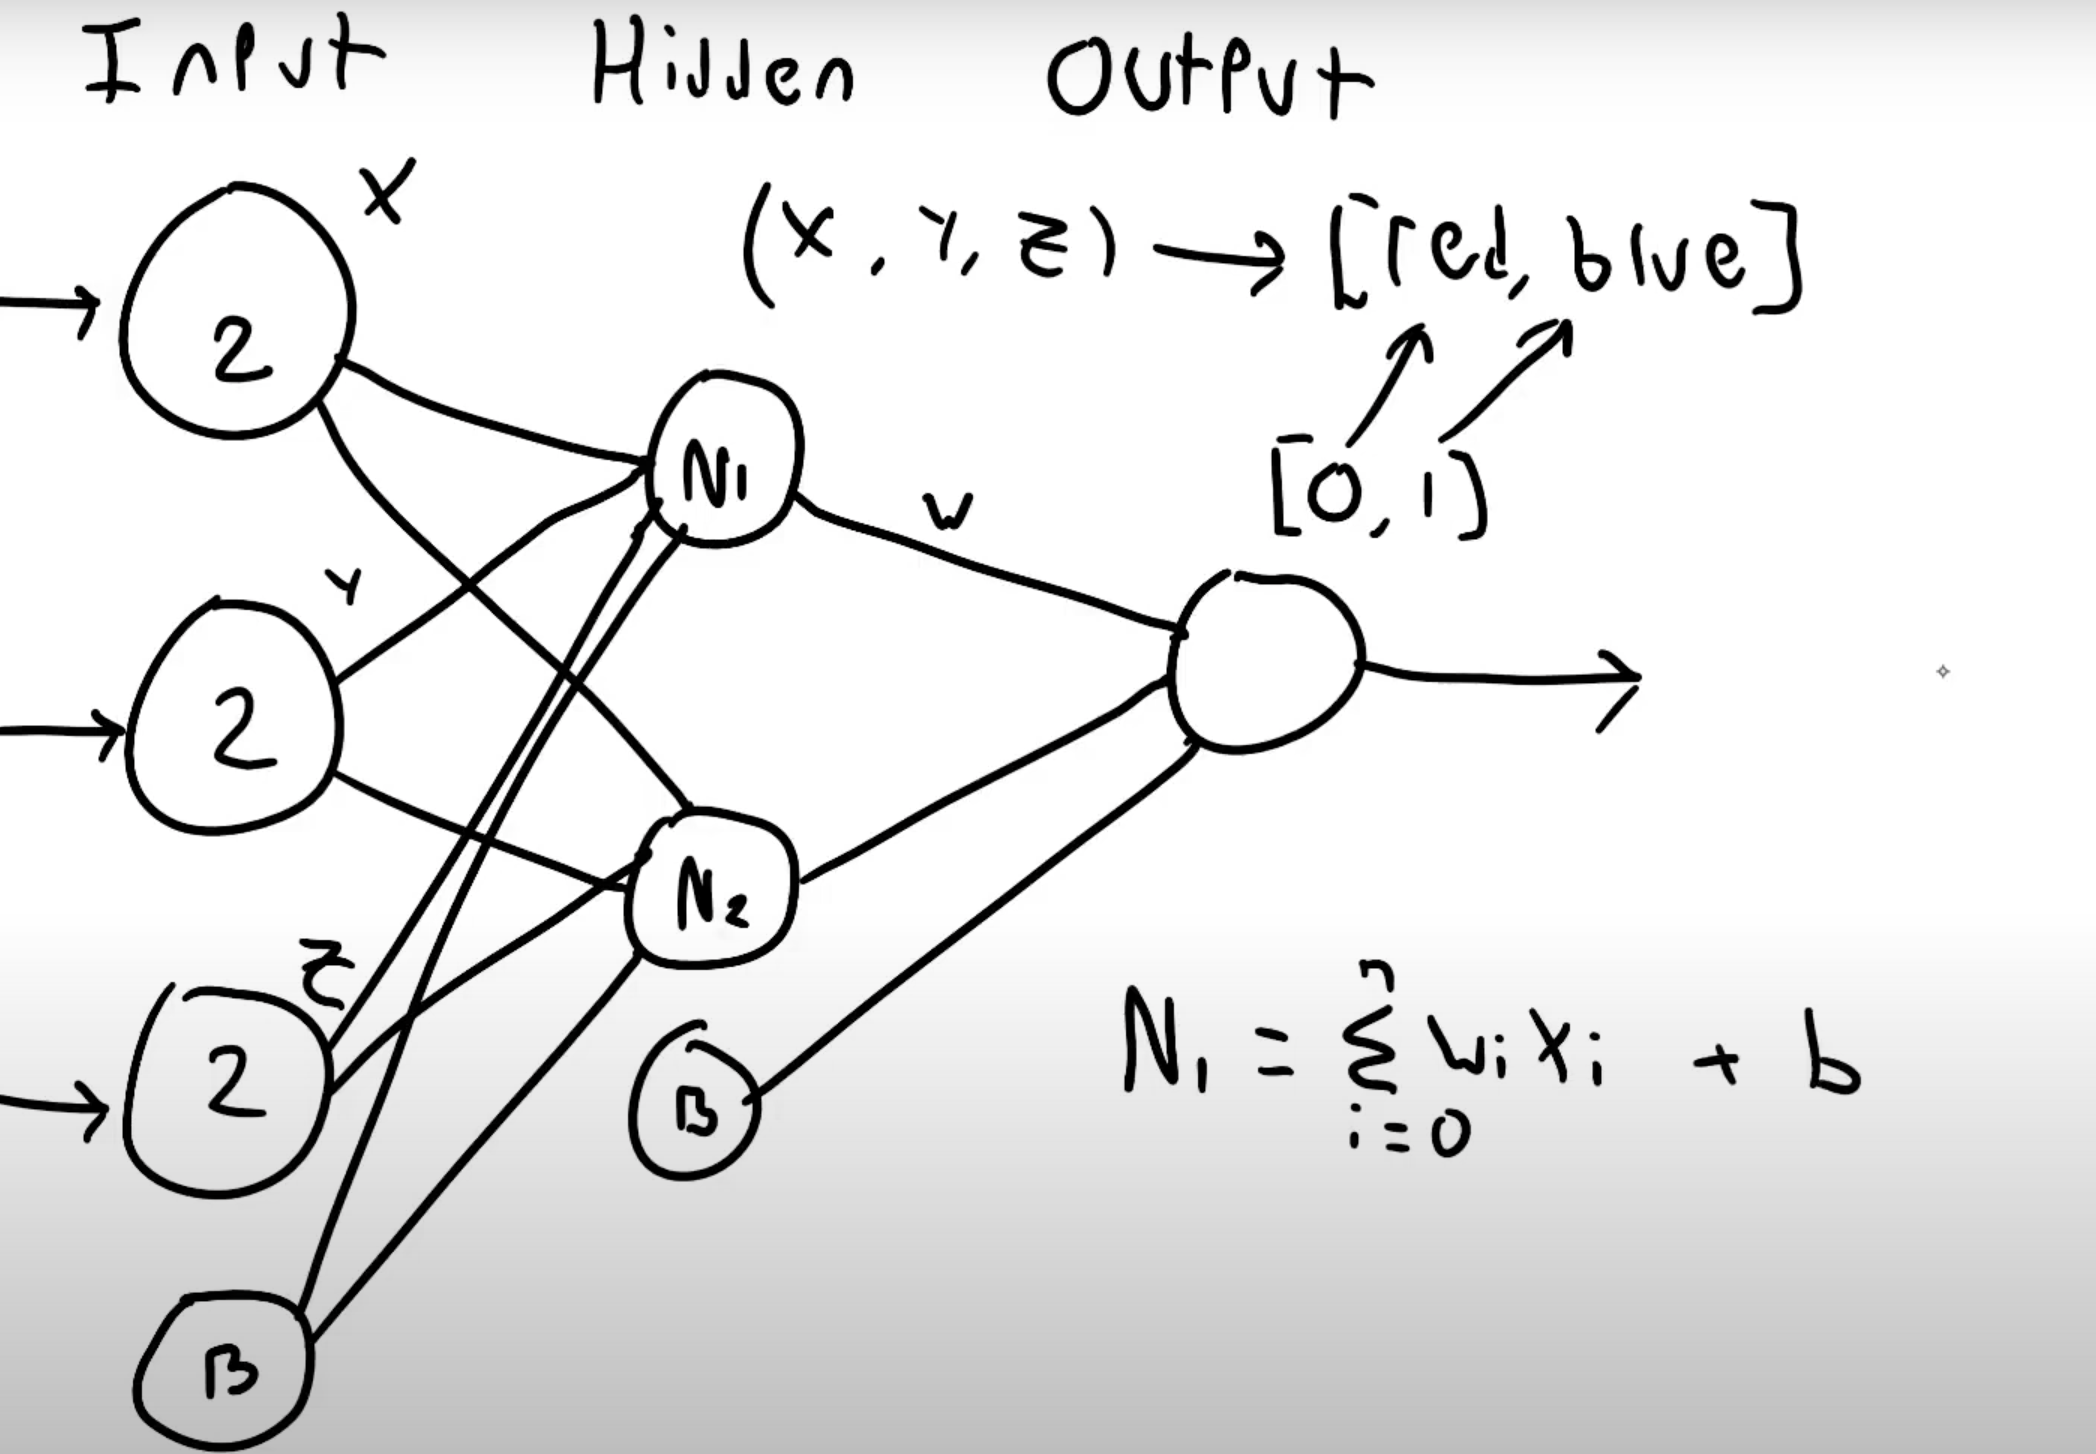

### О функциях активации, оптимизационных моделях

* Функции активации часто нужны для того чтобы «приземлить» выходные данные на отрезок [0,1], ведь если N_1 (вес какого либо нейрона) будет равен 700 - а это случайное значение в начале каждой итерации, то выходные данные вряд ли будут [0,1].
* Функция ошибки - показывает насколько далек результат модели от истинного результата. В английском cost/loss - interchangeable meanings. Виды функций ошибки: 
 - Mean Squared Error, 
 - Mean Absolute Error, 
 - Hinge Loss.  
* Градиентный спуск. Алгоритм градиентного спуска заключается в поиске глобального минимума функции ошибки.
- Виды оптимизационных моделей:
    - градиентный спуск,
    - стохатический градиентный спуск,
    - мини-пакентный градиентный спуск,
    - моментом,
    - ускоренный градиент Нестерова

# Creating a Neural Network by using Keras

### Импортируем нужные нам библиотеки

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

### Dataset

Будем использовать обучающий dataset "MNIST digits classification dataset", распологающийся внутри keras

In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

Посмотрим на размер датасета.

In [ ]:
train_images.shape # Имеем 60000 картинок 28x28 пикселя

(60000, 28, 28)

Так как мы сталкиваемся с задачей классификации, то запишем на какие классы мы хотим классифицировать объекты

In [ ]:
class_names = ['0','1','2','3','4','5','6','7','8', '9']

Для примера и интереса, посмотрим как выглядит хотя бы одно изображение. Изобразим его с помощью импортированной библиотеки matplotlib

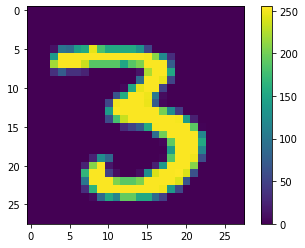

In [ ]:
plt.figure()
plt.imshow(train_images[12])
plt.colorbar()
plt.grid(False)
plt.show()

## Data preprocessing

Перед обработкой приведем данные к нужному формату. Все изображения, заданные в датасете 32x32 пикселя и каждый пиксель зашифрован от 0 до 255. Для того чтобы свести их к [0,1] поделим на 255.

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

## Building the model

С помощью keras построим нейронную сеть. 

В слое №1 (input layer) будем использовать Flatten слой, который имеет размер (32,32) - под размеры входных изображений. Соответственно слой будет иметь 1024 нейрона

В слое №2 (hidden layer) - Dense слое (то есть каждый слой подключен ко всем слоям впереди, поэтому он называется плотной сетью соединения) будем использовать функцию активации Relu (ограничивает снизу нулем). Будем использовать 128 нейронов

В слое №3 (output layer) будем использовать 10 нейронов (так как классов 10). Функция активации - softmax.

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

Скомпилируем нашу модель.

Будем использовать модель оптимизации adam, кроссэнтропическую функцию ошибки.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Training the model

Количество эпох - рандомное, получено экспериментальным путем

In [ ]:
model.fit(train_images, train_labels, epochs=10)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2612 - accuracy: 0.9253
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1161 - accuracy: 0.9656
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0777 - accuracy: 0.9761
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0587 - accuracy: 0.9819
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0445 - accuracy: 0.9864
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0352 - accuracy: 0.9894
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0270 - accuracy: 0.9922
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0229 - accuracy: 0.9928
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0182 - accuracy: 0.9945
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.016

## Evaluate the model

Получим статистику работы модели. 

The *verbose* argument is defined from the keras documentation as:
"verbose: 0 or 1. Verbosity mode. 0 = silent, 1 = progress bar."
(https://keras.io/models/sequential/)

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0827 - accuracy: 0.9787
Test accuracy: 0.9786999821662903


## Making predictions

In [ ]:
predictions = model.predict(test_images)
maxval = np.argmax(predictions[0])

display('predicted value:', maxval)
display('real value', test_labels[0])

313/313 [==============================] - 1s 2ms/step


'predicted value:'

7

'real value'

7

Следующий код был взят из курса, но он демонстрирует суть:

Pick a number: 14
1/1 [==============================] - 0s 18ms/step


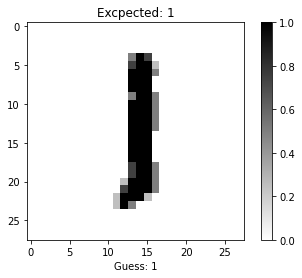

In [ ]:
from pyparsing.helpers import nums
COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
  prediction = model.predict(np.array([image]))
  # print(np.argmax(prediction))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  num = input("Pick a number: ")
  num = int(num)
  return num

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
